In [1]:
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplstereonet
import numpy as np

sys.path.append("../../") #libs directory
from pycompass.SNE import pdf

%matplotlib inline

In [2]:
#generate a fake dataset
pop1 = np.array([np.random.normal(315,10,200),np.random.normal(50,1,200)]) #trend = 045+-10 degrees, plunge = 60+-10 degrees
pop2 = np.array([np.random.normal(45,5,1000),np.random.normal(45,45,1000)]) #trend = 270+-10 degrees, plunge = 0+-30 degrees
data = np.array([np.append(pop1[0],pop2[0]),np.append(pop1[1],pop2[1])])

In [3]:
#evaluate kde on grid
res = 250 #grid resolution
bw = 5 #bandwidth of kde (in degrees)
grid = pdf.grid(res)
kde = pdf.sphericalKDE(grid,data,bw,degrees=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


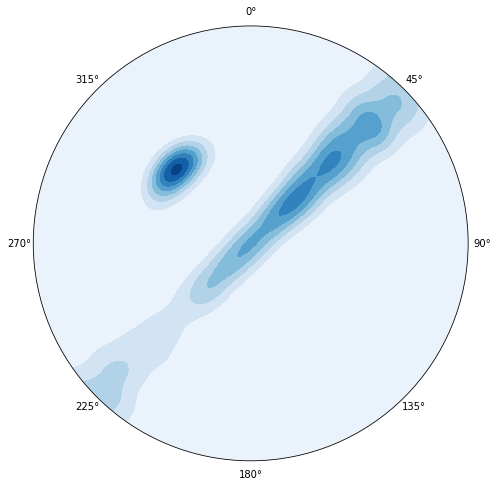

In [5]:
#reshape kde into a 2D grid
res = int(np.sqrt(grid.shape[1]))
assert res == np.sqrt(grid.shape[1]), "Error plotting KDE - supplied grid must be square."
kde2D = np.reshape(kde,(res,res)).T

#build meshgrid of plotting coordinates (in lat,lon)
bound = np.pi / 2
X,Y = np.meshgrid(np.linspace(-bound,bound,res), np.linspace(-bound,bound,res)) #rectangular plot of polar data

#plot
figsize = (8,8)
fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(111, projection='stereonet')
#cs = ax1.pcolormesh(X,Y,kde2D,**kwds)
cs = ax1.contourf(X,Y,kde2D,cmap="R")

fig.show()